Loaded image: E:\Face Recognition\Dataset\Faces\Akshay Kumar\Akshay Kumar_0.jpg
Loaded image: E:\Face Recognition\Dataset\Faces\Akshay Kumar\Akshay Kumar_1.jpg
Loaded image: E:\Face Recognition\Dataset\Faces\Akshay Kumar\Akshay Kumar_10.jpg
Loaded image: E:\Face Recognition\Dataset\Faces\Akshay Kumar\Akshay Kumar_11.jpg
Loaded image: E:\Face Recognition\Dataset\Faces\Akshay Kumar\Akshay Kumar_12.jpg


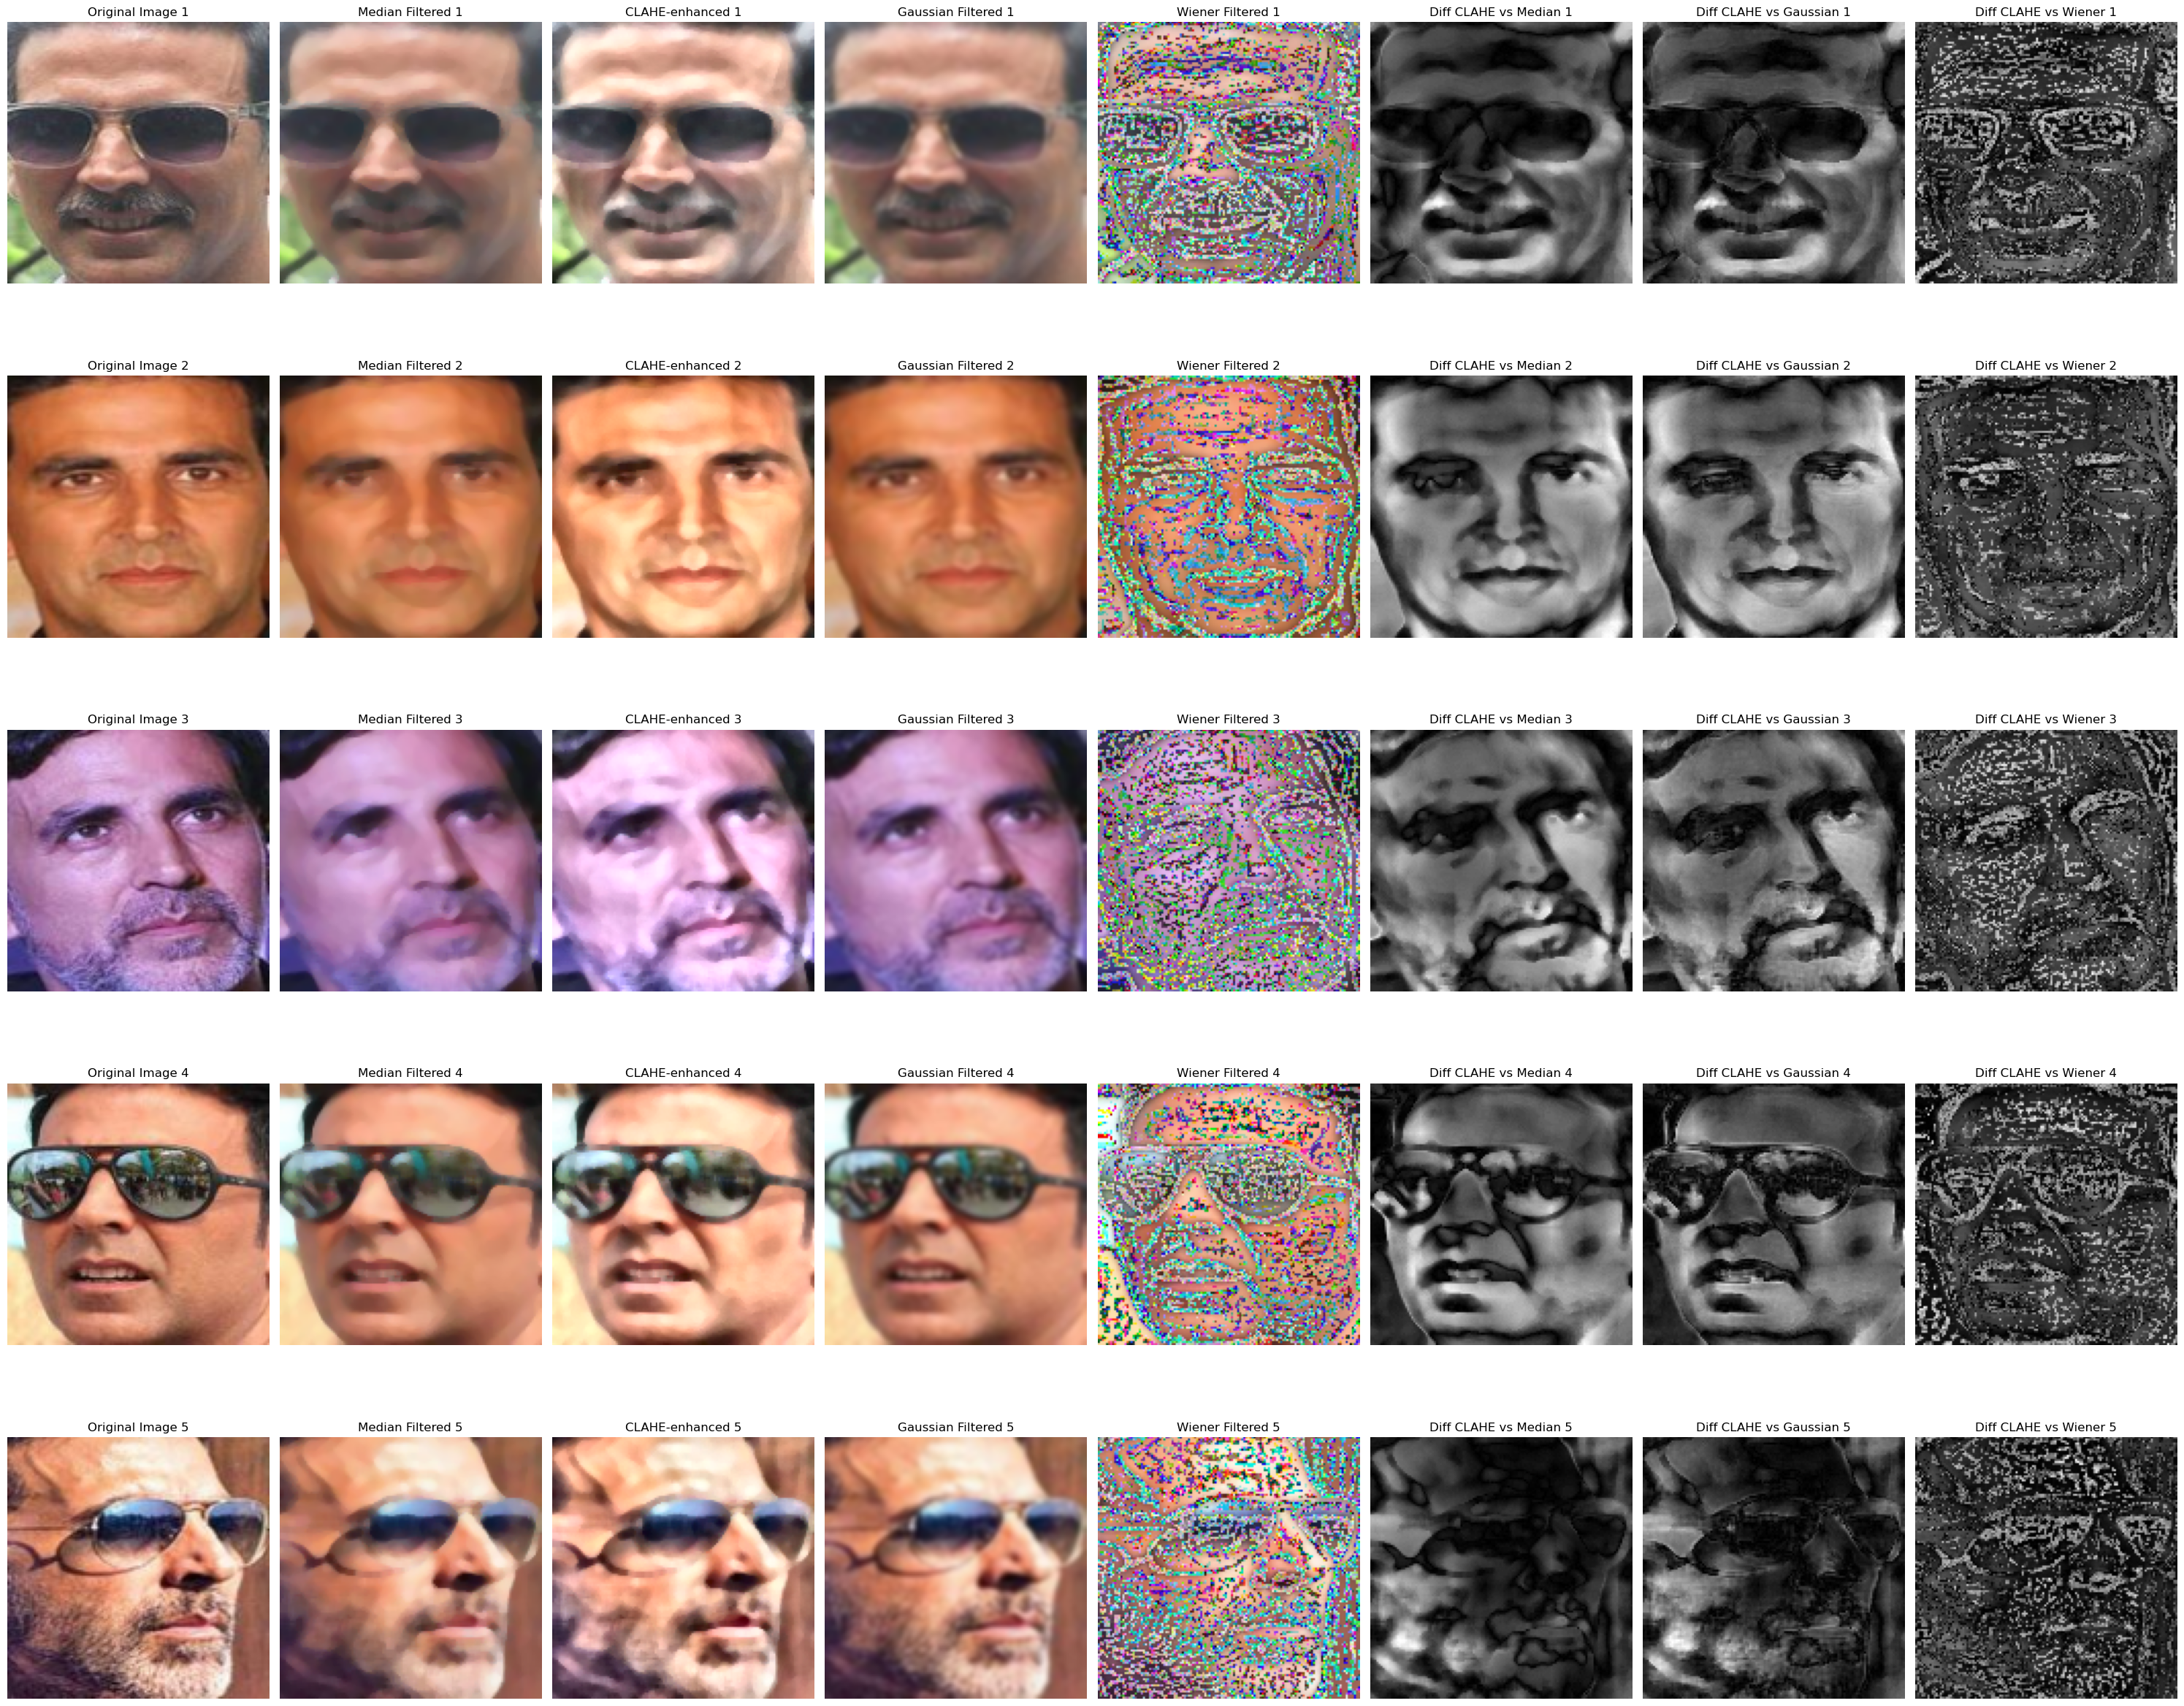

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the dataset
dataset_dir = r"E:\Face Recognition\Dataset\Faces"
image_size = (128, 128)
example_images_original = []
example_images_median = []
example_images_clahe = []
example_images_gaussian = []
example_images_wiener = []
num_examples = 5

def wiener_filter(image, kernel_size=5, noise_var=0.1):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    local_mean = cv2.filter2D(image, -1, kernel)
    local_var = cv2.filter2D(image**2, -1, kernel) - local_mean**2
    noise_var = max(noise_var, np.mean(local_var))
    wiener_filter = local_var / (local_var + noise_var)
    wiener_image = local_mean + wiener_filter * (image - local_mean)
    return wiener_image

# Simplified processing loop
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        image_path = os.path.join(root, file)
        image = cv2.imread(image_path)

        if image is not None:
            print(f"Loaded image: {image_path}")  # Debugging line
            
            # Resize the image
            image_resized = cv2.resize(image, image_size)
            
            # Apply median filter
            image_median = cv2.medianBlur(image_resized, 5)
            
            # Apply Gaussian filter
            image_gaussian = cv2.GaussianBlur(image_resized, (5, 5), 0)
            
            # Apply Wiener filter
            image_wiener = np.zeros_like(image_resized)
            for i in range(3):  # Process each channel separately
                image_wiener[:, :, i] = wiener_filter(image_resized[:, :, i])
            
            # Apply CLAHE
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            image_clahe = cv2.cvtColor(image_median, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(image_clahe)
            l_clahe = clahe.apply(l)
            image_clahe = cv2.merge((l_clahe, a, b))
            image_clahe = cv2.cvtColor(image_clahe, cv2.COLOR_LAB2BGR)
            
            # Store images
            example_images_original.append(image_resized)
            example_images_median.append(image_median)
            example_images_gaussian.append(image_gaussian)
            example_images_wiener.append(image_wiener)
            example_images_clahe.append(image_clahe)
            
            if len(example_images_original) >= num_examples:
                break
    if len(example_images_original) >= num_examples:
        break

# Function to display images and their differences
def show_images_with_differences(original_images, median_images, clahe_images, gaussian_images, wiener_images):
    num_images = len(original_images)
    plt.figure(figsize=(30, num_images * 5))
    
    for i in range(num_images):
        # Original images
        plt.subplot(num_images, 8, 8 * i + 1)
        plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image {i+1}')
        plt.axis('off')
        
        # Median filtered images
        plt.subplot(num_images, 8, 8 * i + 2)
        plt.imshow(cv2.cvtColor(median_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Median Filtered {i+1}')
        plt.axis('off')
        
        # CLAHE-enhanced images
        plt.subplot(num_images, 8, 8 * i + 3)
        plt.imshow(cv2.cvtColor(clahe_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'CLAHE-enhanced {i+1}')
        plt.axis('off')
        
        # Gaussian filtered images
        plt.subplot(num_images, 8, 8 * i + 4)
        plt.imshow(cv2.cvtColor(gaussian_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Gaussian Filtered {i+1}')
        plt.axis('off')
        
        # Wiener filtered images
        plt.subplot(num_images, 8, 8 * i + 5)
        plt.imshow(cv2.cvtColor(wiener_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Wiener Filtered {i+1}')
        plt.axis('off')
        
        # Difference with CLAHE vs Median
        plt.subplot(num_images, 8, 8 * i + 6)
        diff_median = cv2.absdiff(cv2.cvtColor(clahe_images[i], cv2.COLOR_BGR2GRAY), cv2.cvtColor(median_images[i], cv2.COLOR_BGR2GRAY))
        plt.imshow(diff_median, cmap='gray')
        plt.title(f'Diff CLAHE vs Median {i+1}')
        plt.axis('off')
        
        # Difference with CLAHE vs Gaussian
        plt.subplot(num_images, 8, 8 * i + 7)
        diff_gaussian = cv2.absdiff(cv2.cvtColor(clahe_images[i], cv2.COLOR_BGR2GRAY), cv2.cvtColor(gaussian_images[i], cv2.COLOR_BGR2GRAY))
        plt.imshow(diff_gaussian, cmap='gray')
        plt.title(f'Diff CLAHE vs Gaussian {i+1}')
        plt.axis('off')
        
        # Difference with CLAHE vs Wiener
        plt.subplot(num_images, 8, 8 * i + 8)
        diff_wiener = cv2.absdiff(cv2.cvtColor(clahe_images[i], cv2.COLOR_BGR2GRAY), cv2.cvtColor(wiener_images[i], cv2.COLOR_BGR2GRAY))
        plt.imshow(diff_wiener, cmap='gray')
        plt.title(f'Diff CLAHE vs Wiener {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show the example images with differences
if (example_images_original and example_images_median and
    example_images_clahe and example_images_gaussian and
    example_images_wiener):
    show_images_with_differences(example_images_original, example_images_median, example_images_clahe, example_images_gaussian, example_images_wiener)
else:
    print("No images to display.")
